Business Question # 1: Can we predict the IMDb rating of a movie based on its genre, runtime, release year, and number of reviews?

Methodology: Use multiple linear regression or a random forest regressor to predict a movie’s rating

Business Impact: A streaming platform or production company can use this to estimate the potential success of a movie before release and optimize investment.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load and Inspect the Data

In [19]:
df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 6/data/Copy of merged_dataset.csv")
print(df.head())
print(df.info())

                                                name  year movie_rated  \
0                                          Inception  2010       PG-13   
1  The Lord of the Rings: The Fellowship of the Ring  2001       PG-13   
2      The Lord of the Rings: The Return of the King  2003       PG-13   
3                              The Dark Knight Rises  2012       PG-13   
4              The Lord of the Rings: The Two Towers  2002       PG-13   

   run_length     genres  rating  num_raters  num_reviews  
0         148     Action     8.8     1981675         3820  
1         178     Action     8.8     1609165         5365  
2         201  Adventure     8.9     1593859         3681  
3         164     Action     8.4     1470329         2979  
4         179  Adventure     8.7     1440188         2559  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   

Preprocess the Data

In [20]:
# drop Movie Name, it will not be used in modeling
df = df.drop(columns=['name'])

# Encode movie_rated (Movie Rating)
# Convert categorical ratings (e.g., "PG-13", "R") into numbers:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['movie_rated'] = le.fit_transform(df['movie_rated'])  # Convert text to numbers




a) Handle Categorical Data (Genres)

Since genres is categorical, we one-hot encode it:

In [21]:
df['genres'] = df['genres'].astype(str)  # Ensure it's a string
encoder = OneHotEncoder(sparse_output=False)
genres_encoded = encoder.fit_transform(df[['genres']])

# Convert to DataFrame and merge
genres_df = pd.DataFrame(genres_encoded, columns=encoder.get_feature_names_out(['genres']))
df = pd.concat([df, genres_df], axis=1).drop(columns=['genres'])


b) Normalize Continuous Features

Scaling helps improve model performance:

In [22]:
scaler = StandardScaler()
df[['run_length', 'year', 'num_reviews', 'num_raters']] = scaler.fit_transform(df[['run_length', 'year', 'num_reviews', 'num_raters']])

4. Split Data into Train and Test Sets

In [23]:
X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Multiple Linear Regression Model

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the Model

In [25]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.3986
Mean Squared Error (MSE): 0.3236
R-squared (R²): 0.4215


Interpret Results & Feature Importance

    Check feature weights (coefficients):

In [26]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

             Feature  Coefficient
3         num_raters     0.421213
8   genres_Biography     0.318442
7   genres_Animation     0.226494
15    genres_Romance     0.153405
11      genres_Drama     0.137870
10      genres_Crime     0.104317
2         run_length     0.087217
9      genres_Comedy     0.009340
16     genres_Sci-Fi     0.008964
1        movie_rated     0.004668
17   genres_Thriller     0.000000
4        num_reviews    -0.011206
14    genres_Mystery    -0.033745
6   genres_Adventure    -0.117825
13     genres_Horror    -0.185506
0               year    -0.195075
5      genres_Action    -0.304568
12    genres_Fantasy    -0.317187


Visualize the Results

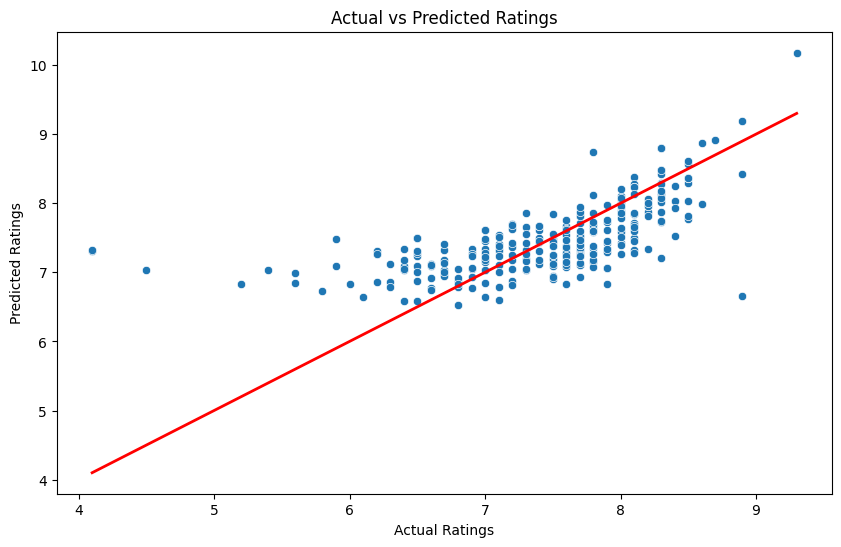

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

C:\Users\jason\AppData\Local\Temp\ipykernel_35932\1402009654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_features['Coefficient'], y=top_bottom_features['Feature'], palette='coolwarm')


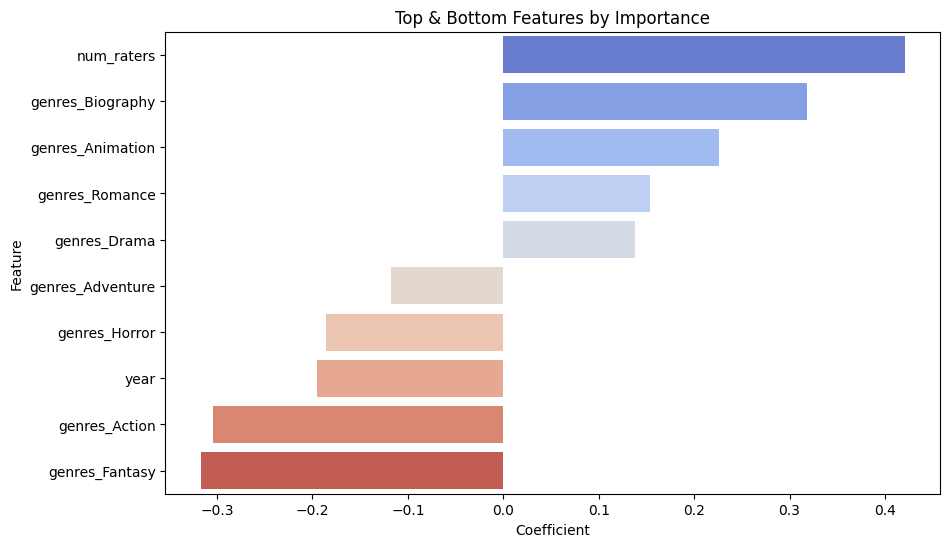

In [30]:
top_bottom_features = pd.concat([feature_importance.head(5), feature_importance.tail(5)])
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_features['Coefficient'], y=top_bottom_features['Feature'], palette='coolwarm')
plt.title('Top & Bottom Features by Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()